In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [ ]:
# 중간 중단 기능
def wait_for_enter(step_name="다음 단계로 진행하려면 Enter 키를 누르세요."):
    input(f"\n {step_name} (Enter)")

In [ ]:
# 1. 데이터 로드
print("\n[1단계] 데이터 로드 중...")
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

print("데이터 샘플 예시:")
print(X.head())
print("\n 타겟 값 예시:")
print(y.head())

wait_for_enter("2단계 : 데이터 전처리 샘플 보기")

# 2. 전처리 (예시 : 결측치 확인)
print("\n[2단계] 데이터 전처리 점검...")
print(" 결측치 여부 확인:")
print(X.isnull().sum())
print("\n 기본 통계량 확인:")
print(X.describe())

wait_for_enter("3단계: 훈련/테스트 데이터 분할")

# 3. 데이터 분할
print("\n[3단계] 데이터 분할 (train/test)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f" 훈련 데이터 크기: {X_train.shape}")
print(f" 테스트 데이터 크기: {X_test.shape}")
print("\n 훈련 데이터 예시:")
print(X_train.head())

wait_for_enter("4단계: 모델 학습 시작")

# 4. 모델 학습
print("\n[4단계] 모델 학습(RandomForestClassifier)...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print(" 모델 학습 완료.")

wait_for_enter("5단계: 모델 저장 및 로딩")

# 5. 모델 저장 및 로딩
print("\n[5단계] 학습된 모델 저장 및 로딩...")
joblib.dump(model, 'wine_rf_model.pkl')
print(" 모델 저장 완료 (wine_rf_model.pkl)")
loaded_model = joblib.load('wine_rf_model.pkl')
print(" 모델 로딩 완료")

wait_for_enter("6단계: 예측 수행")

# 6. 예측
print("\n[6단계] 테스트 데이터 예측 수행...")
print(" 예측에 사용될 테스트 데이터 샘플:")
print(X_test.head())
y_pred = loaded_model.predict(X_test)
print(" 예측 완료")

wait_for_enter("7단계: 결과 평가")

# 7. 결과 평가
print("\n[7단계] 결과 평가")
accuracy = accuracy_score(y_test, y_pred)
print(f" 정확도: {accuracy:.4f}\n")
print(" 분류 리포트:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


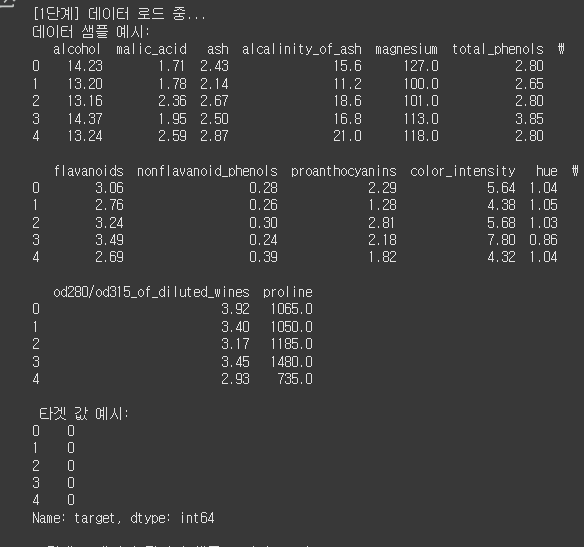

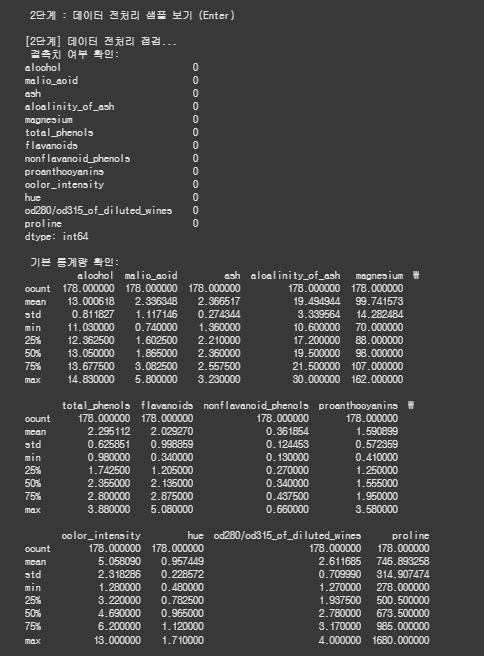

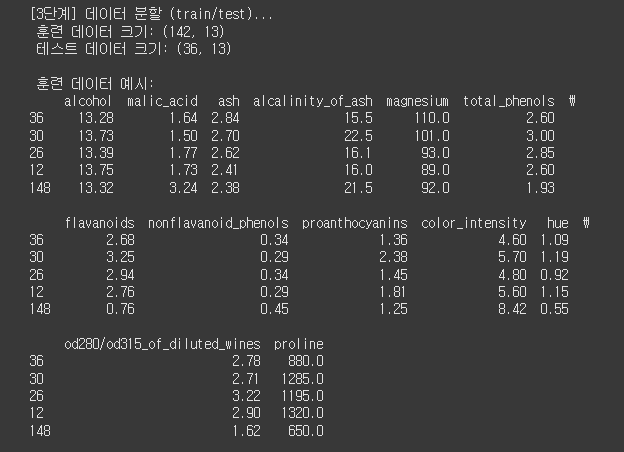

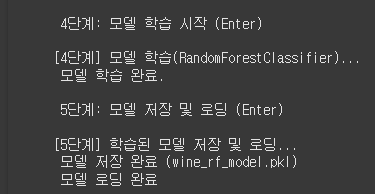

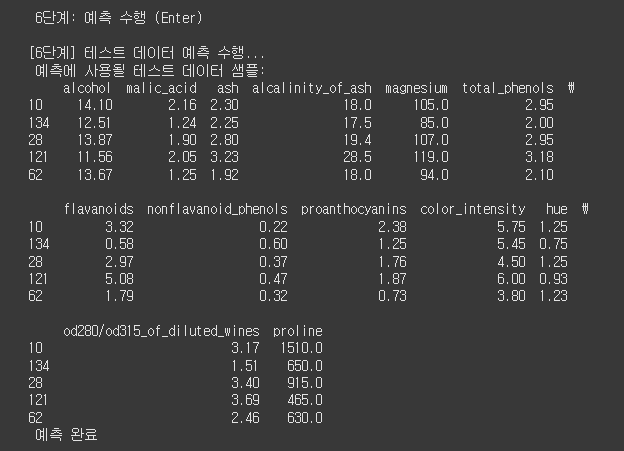

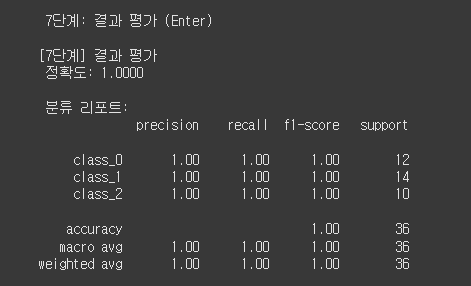